<a href="https://colab.research.google.com/github/fleshuu/DLUB2021/blob/master/Seminar_3_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning UB 2021 
## Семинар 3 -- Шугаман регрессийг машин сургалтын аргаар бодъё.


# Өмнөх дугаарт ....

## Багштай сургалт (supervised learning)-н ерөнхий дүр зураг


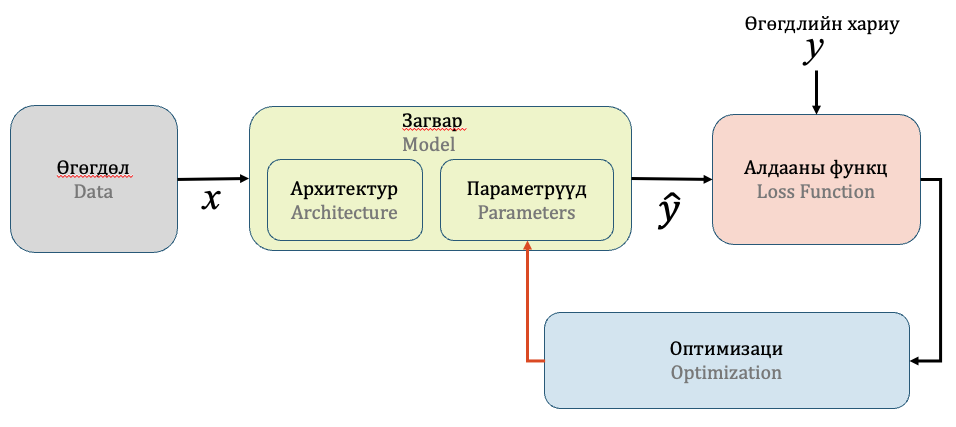


## Өнөөдөр, дээрх зурагийн дагуу, доорх *загвар - алдааны функц -- оптимизацийн алгоритм* гуравыг ажиллуулж үзнэ. 
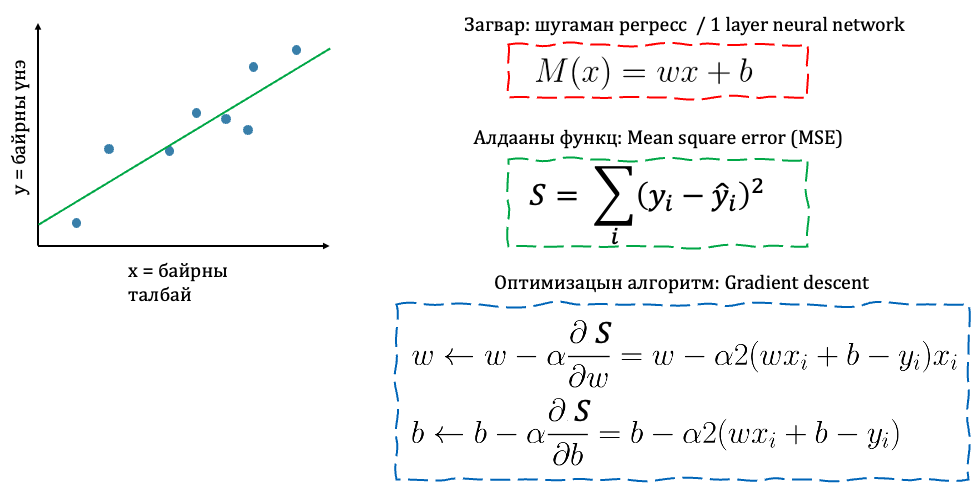

## Neural network дүрслэл


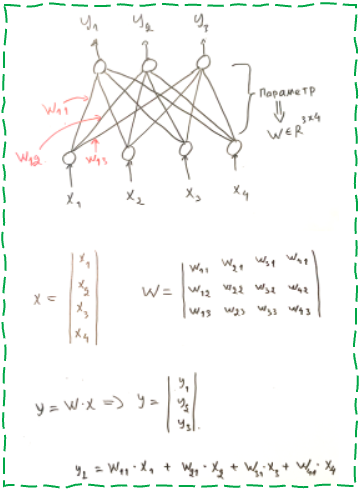

## Нэг зүйл, олон талаас харж болно. 


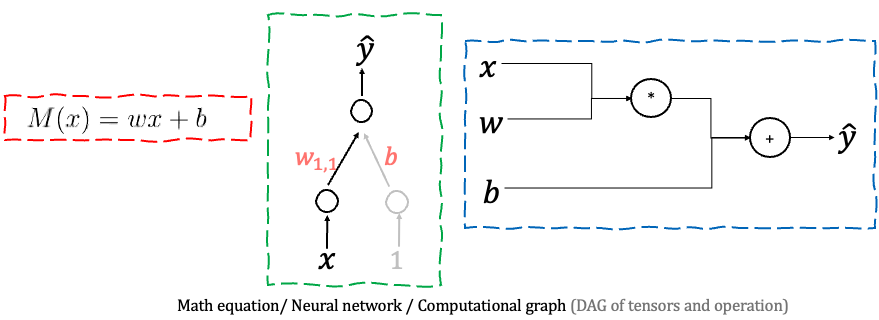

### Шугаман давхарга / Linear layer

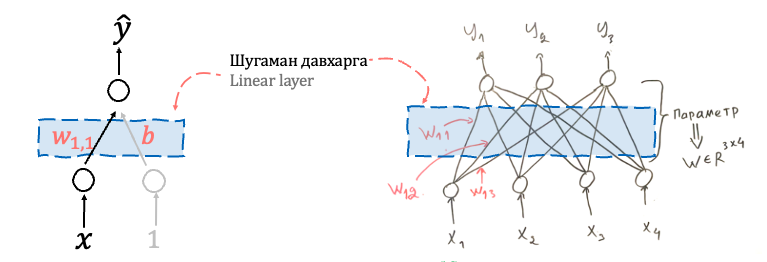

---
---
# За жинxнээсээ семинараа эхлэе! 



In [1]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt

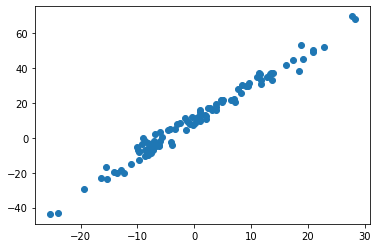

In [ ]:
# Өгөгдөлөө бэлдье. 
# 100 shirheg X, y uusgey 
# y = w*x + b  shuluuniig toirson random tseguud 

# X = np.random.normal(0, 1, 100) * 10
# y = 2 * X  + np.random.normal(0, 3, 100) + 10
# plt.plot(X,y, "o")

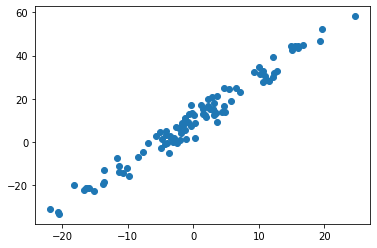

In [2]:
X = torch.randn(100, 1)*10
y = 2 * X + 3 * torch.randn(100, 1) + 10 
plt.plot(X.numpy(), y.numpy(), 'o')

In [ ]:
# Загвараа бэлдье
# y = w*x + b 

# class LinearRegress():
#   def __init__(self, learning_rate):
#     self.w = np.random.randn(1)
#     self.b = np.random.randn()
#     self.learning_rate = learning_rate

#   def forward(self, x):
#     y_pred = self.w*x + self.b 
#     return y_pred

#   def get_params(self):
#     print("w: " + str(self.w))
#     print("b: " + str(self.b))
#     print("lr: " + str(self.learning_rate))

#   # Loss function: MSE
#   def get_loss(self, x, y):
#     y_pred = self.forward(x)
#     S = np.sum( (y_pred-y)**2 ) / len(x) 
#     return S

#   def get_grad(self, x, y):
#     y_pred = self.forward(x)
#     grad_w = np.sum( x.dot((y_pred - y)) ) / len(x)
#     grad_b = np.sum(y_pred - y) / len(x)
#     return grad_w, grad_b

#   # Optimization algorithm: gradient descent
#   def backward(self, grad_w, grad_b):
#     self.w = self.w - self.learning_rate * grad_w
#     self.b = self.b - self.learning_rate * grad_b

#   def plot_model(self, x, y):
#     plt.scatter(x, y)
#     x_1 = np.array([-30,30])
#     y_1 = model.w*x_1 + model.b
#     plt.plot(x_1, y_1, 'r')
#     plt.show()    
  

In [24]:
class LinearRegress(nn.Module):
  def __init__(self):
    super().__init__()
    # self.w = torch.randn(1, 1, required_grad = True)
    # self.b = torch.randn(1, 1, required_grad = True) # grad descent hiih param mun
    self.linear = nn.Linear(1, 1)
    
  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

  def get_loss(self, y_pred, y):
    S = (y_pred - y).pow(2).sum() / len(y_pred)
    return S

  def get_params(self):
    [w, b] = self.parameters() #model
    return w.item(), b.item()

  def plot_model(self, x, y):
    w, b = self.get_params()
    plt.scatter(x, y)
    x_1 = np.array([-30,30])
    y_1 = w*x_1 + b
    plt.plot(x_1, y_1, 'r')
    plt.show()   

In [14]:
# # Загварынхаа instance-г үүсгэе
# model = LinearRegress(0.01)
# model.get_params()
# model.plot_model(X, y)

In [25]:
model = LinearRegress()
model

[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[-0.2614]], requires_grad=True) Parameter containing:
tensor([0.7545], requires_grad=True)


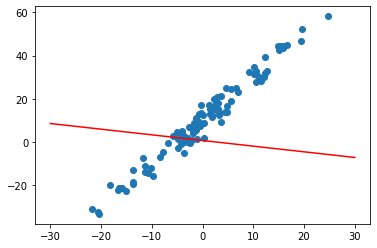

In [26]:
model.plot_model(X, y)

In [27]:
y_pred = model.forward(X)
print(X[:5])
print(y_pred[:5])

tensor([[  3.1013],
        [-21.8152],
        [  6.5142],
        [-13.6982],
        [ -5.7493]])
tensor([[-0.0562],
        [ 6.4568],
        [-0.9483],
        [ 4.3350],
        [ 2.2573]], grad_fn=<SliceBackward>)


0 581.986572265625


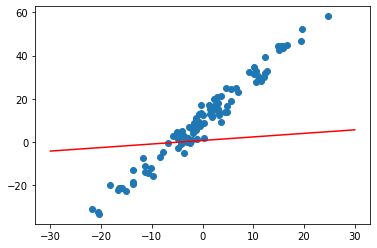

100 71.40785217285156


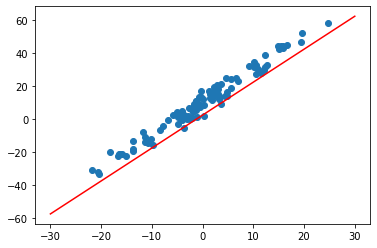

200 51.85490798950195


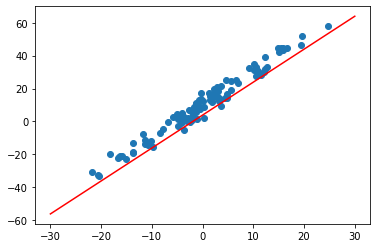

300 38.752899169921875


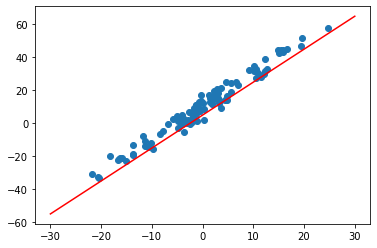

400 29.973493576049805


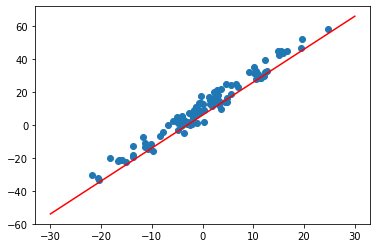

500 24.090608596801758


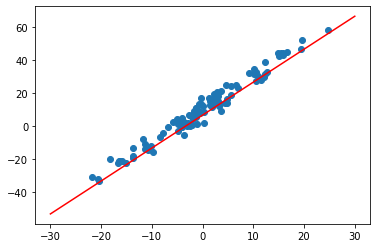

600 20.14860725402832


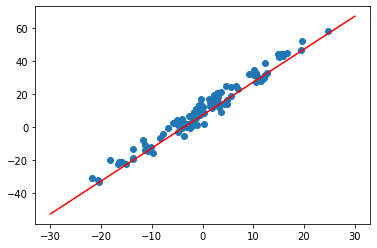

700 17.507152557373047


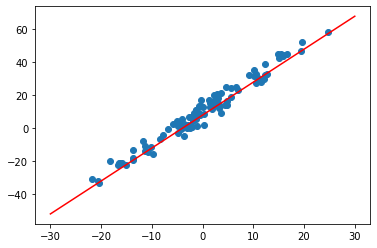

800 15.737174987792969


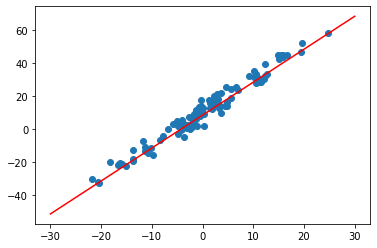

900 14.55115032196045


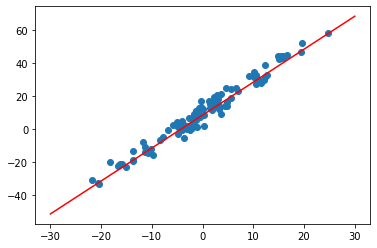

In [29]:
# Загвараа сургая
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

epoch = 1000
losses = list()

for i in range(epoch):
  # grad_w, grad_b = model.get_grad(X, y)
  # model.backward(grad_w, grad_b)
  # loss = model.get_loss(X, y)
  # losses.append(loss)
  y_pred = model.forward(X)
  S = model.get_loss(y_pred, y)

  optimizer.zero_grad()
  S.backward()
  optimizer.step()

  losses.append(S.item())

  if i % 100 == 0:
    print(i, S.item())
    model.plot_model(X, y)



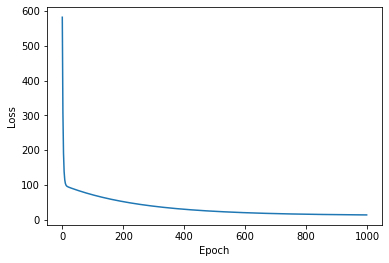

In [30]:
model.get_params()
# Алдаа (loss)-аа зурж үзье. 
plt.plot(range(epoch), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

## Computational graph 

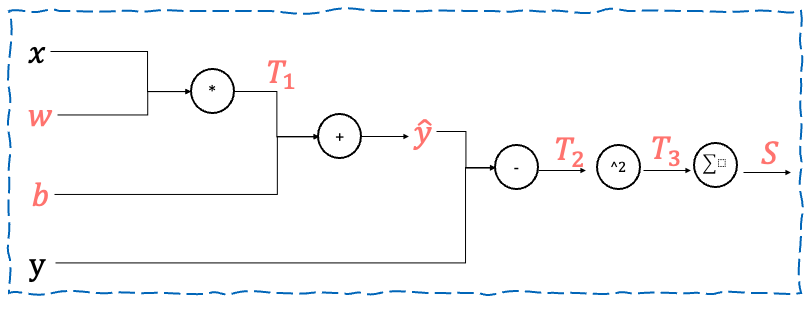


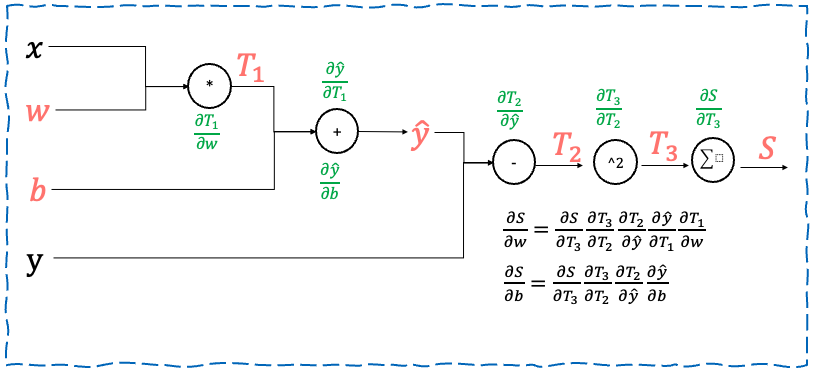